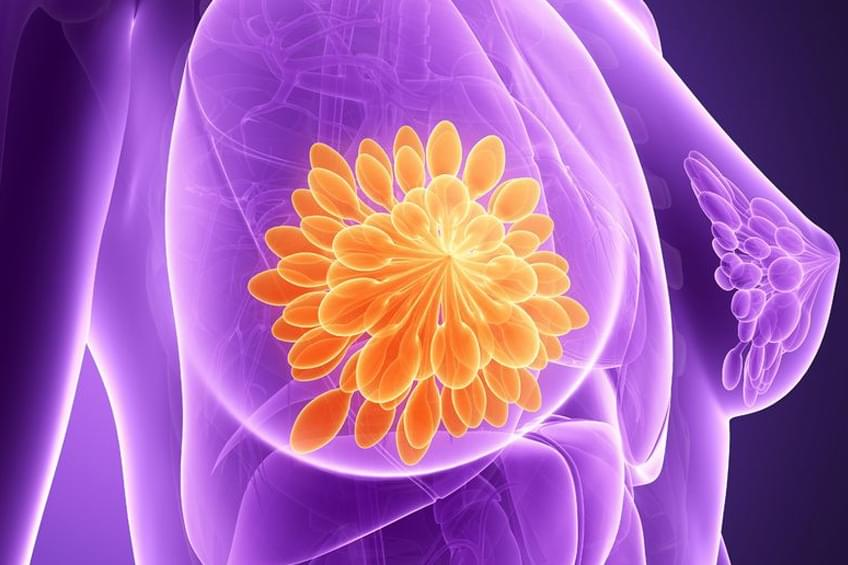

In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import os
Image("cancer.jpg")


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
data = pd.read_csv('Breast_cancer_data.csv')
data

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [5]:
data.isnull().sum()


mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [6]:
data.drop_duplicates(inplace = True)
data

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [12]:
data1 = data.drop(columns = ['mean_perimeter', 'mean_area'], axis = 1)
data1

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0
...,...,...,...,...
564,21.56,22.39,0.11100,0
565,20.13,28.25,0.09780,0
566,16.60,28.08,0.08455,0
567,20.60,29.33,0.11780,0


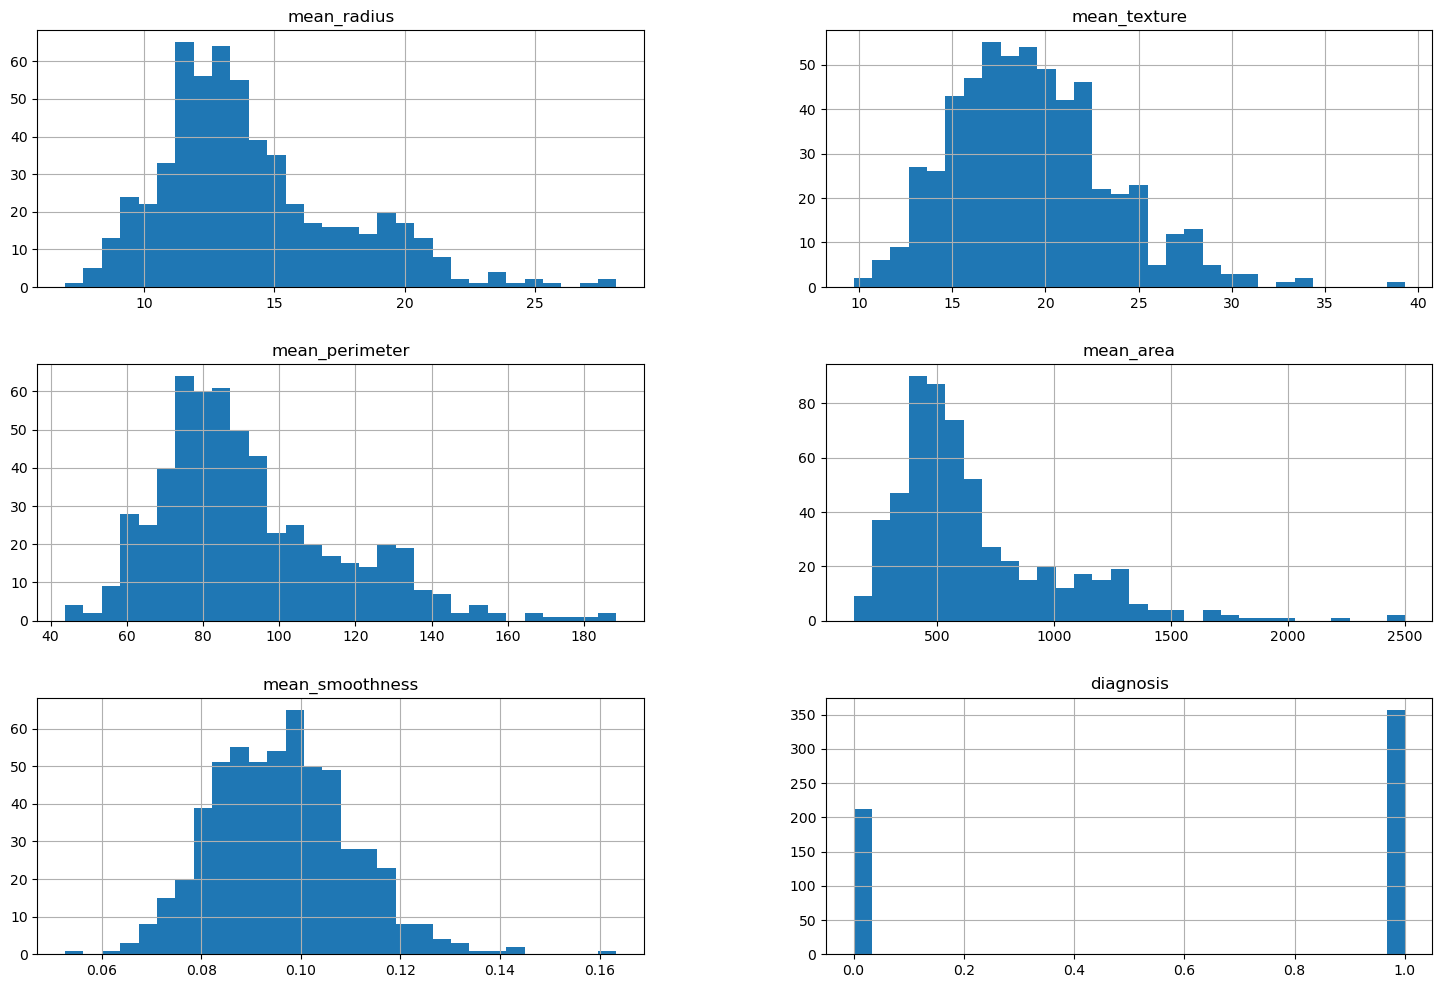

CPU times: total: 938 ms
Wall time: 1.04 s


In [13]:
%%time
data.hist(bins=30, figsize=(18,12))
plt.show()

In [14]:
X = data1.iloc[:,:-1].values
y = data1.iloc[:,-1].values

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Breast_cancer_data.csv')

In [5]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [6]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [7]:
df.duplicated().sum()

0

In [8]:
cols = list(df.columns)
print(cols)

['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'diagnosis']


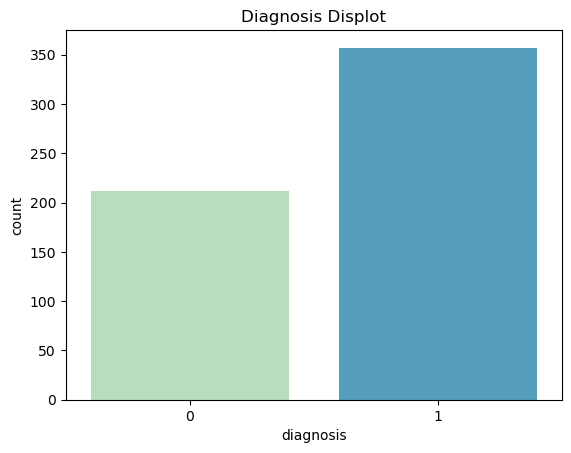

In [9]:
sns.countplot(x='diagnosis', data=df, palette='GnBu')
plt.title('Diagnosis Displot')
plt.show()

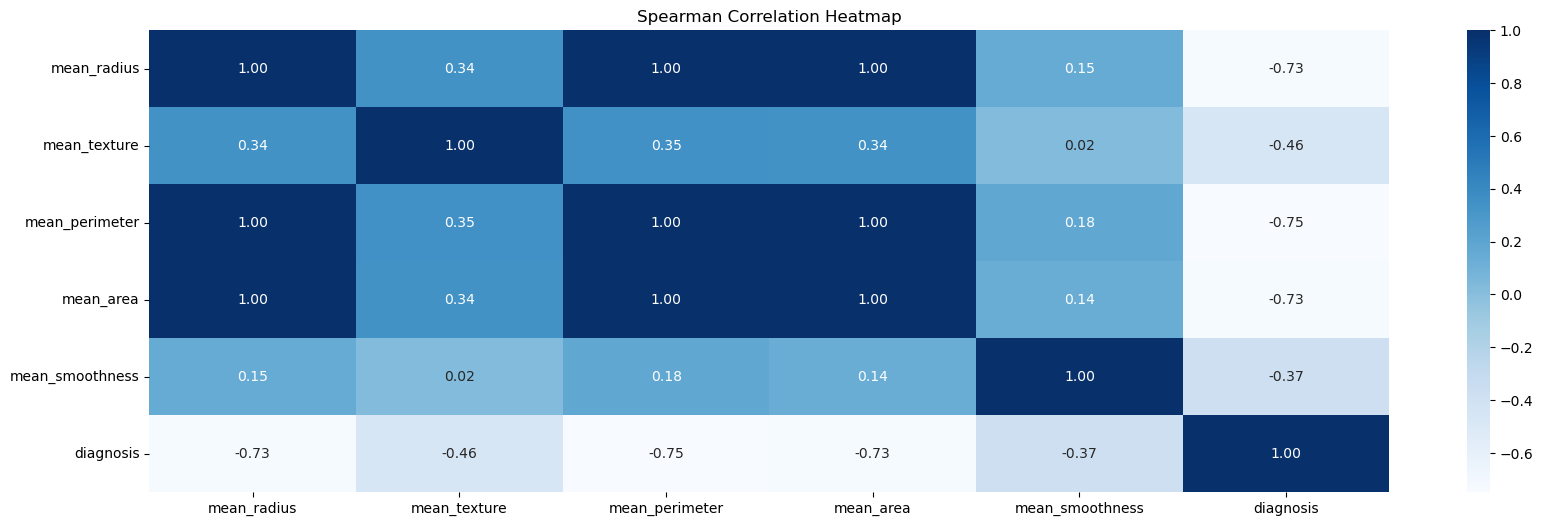

In [10]:
corr = df.corr(method = 'spearman')
plt.figure(figsize=(20,6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues')
plt.title('Spearman Correlation Heatmap')
plt.show()


<Figure size 2000x1000 with 0 Axes>

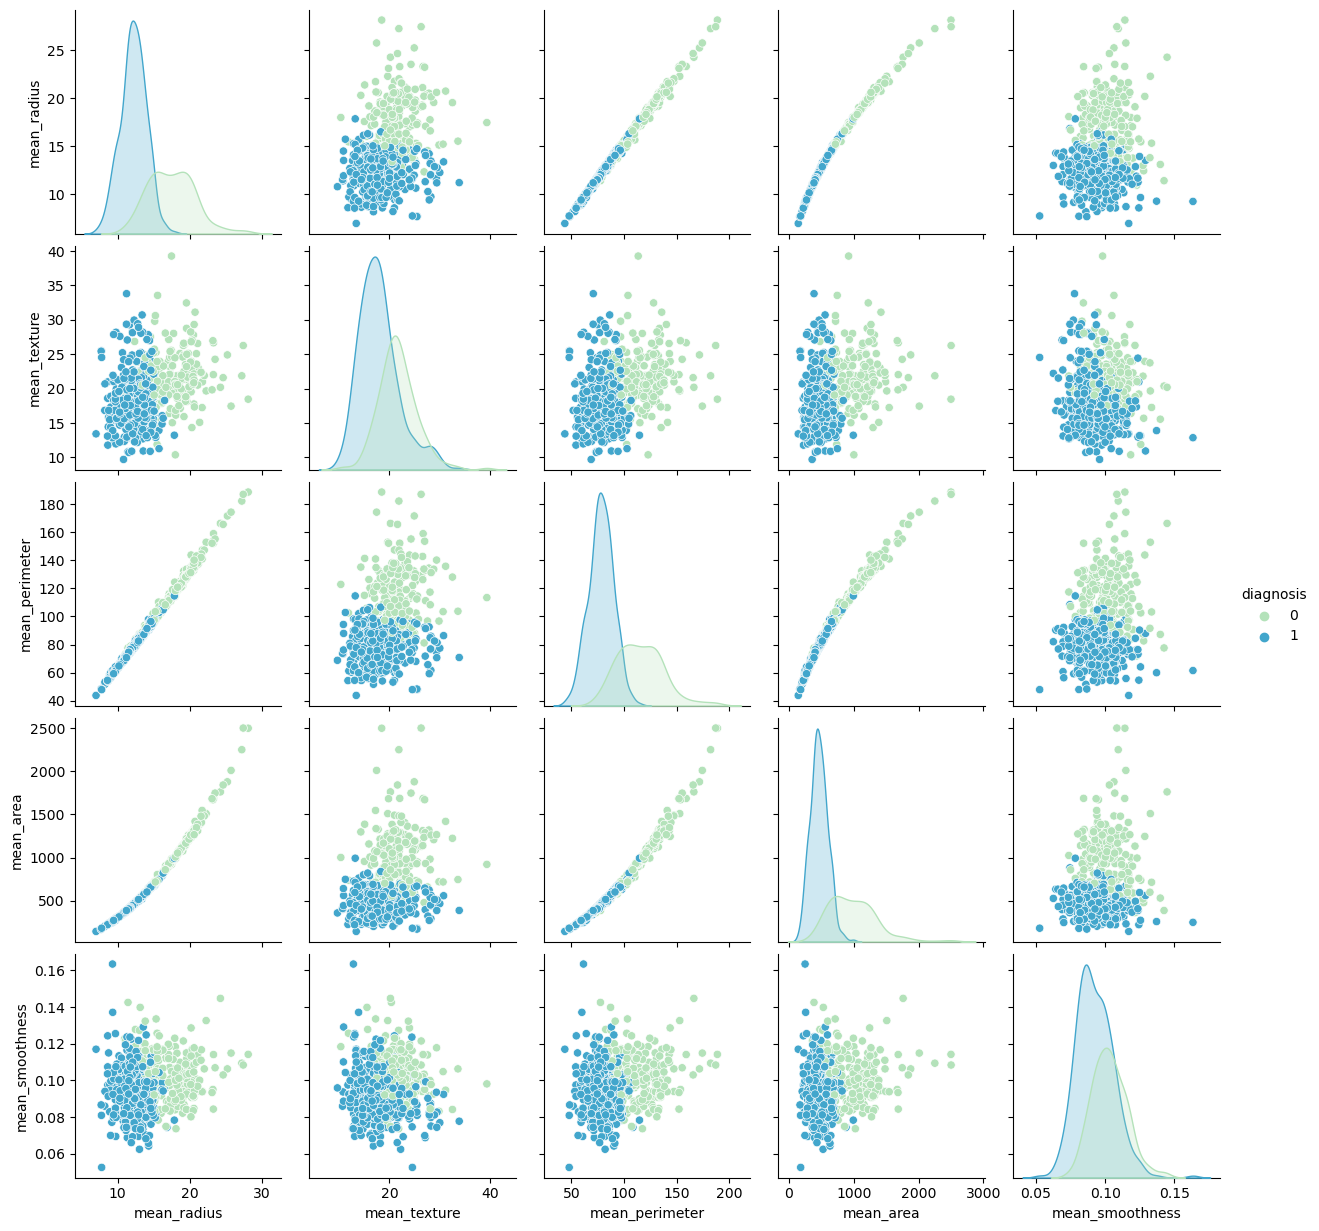

In [11]:
figure = plt.figure(figsize=(20,10))
sns.pairplot(df, hue='diagnosis', palette='GnBu')
plt.show()

C:\Users\Niranjana\AppData\Local\Temp\ipykernel_17040\2375201047.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(ax=axes[i][0], x='diagnosis', y=col, data=df, palette='GnBu', jitter=True)
C:\Users\Niranjana\AppData\Local\Temp\ipykernel_17040\2375201047.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(ax=axes[i][0], x='diagnosis', y=col, data=df, palette='GnBu', jitter=True)
C:\Users\Niranjana\AppData\Local\Temp\ipykernel_17040\2375201047.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(ax=axes[i][0], x='diagnosis', y=col, data=df, palette='GnBu', jitter=True)
C:\Users\Niranjana\AppData\Local\Temp\ipykernel_17040\2375201047.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(ax=axes[i][0], x='diagnosis', y=col, data=df, palette='GnBu', jitter=True)
C:\Users\Niranjana\AppData\Local\Temp\ipykernel_17040\2375201047

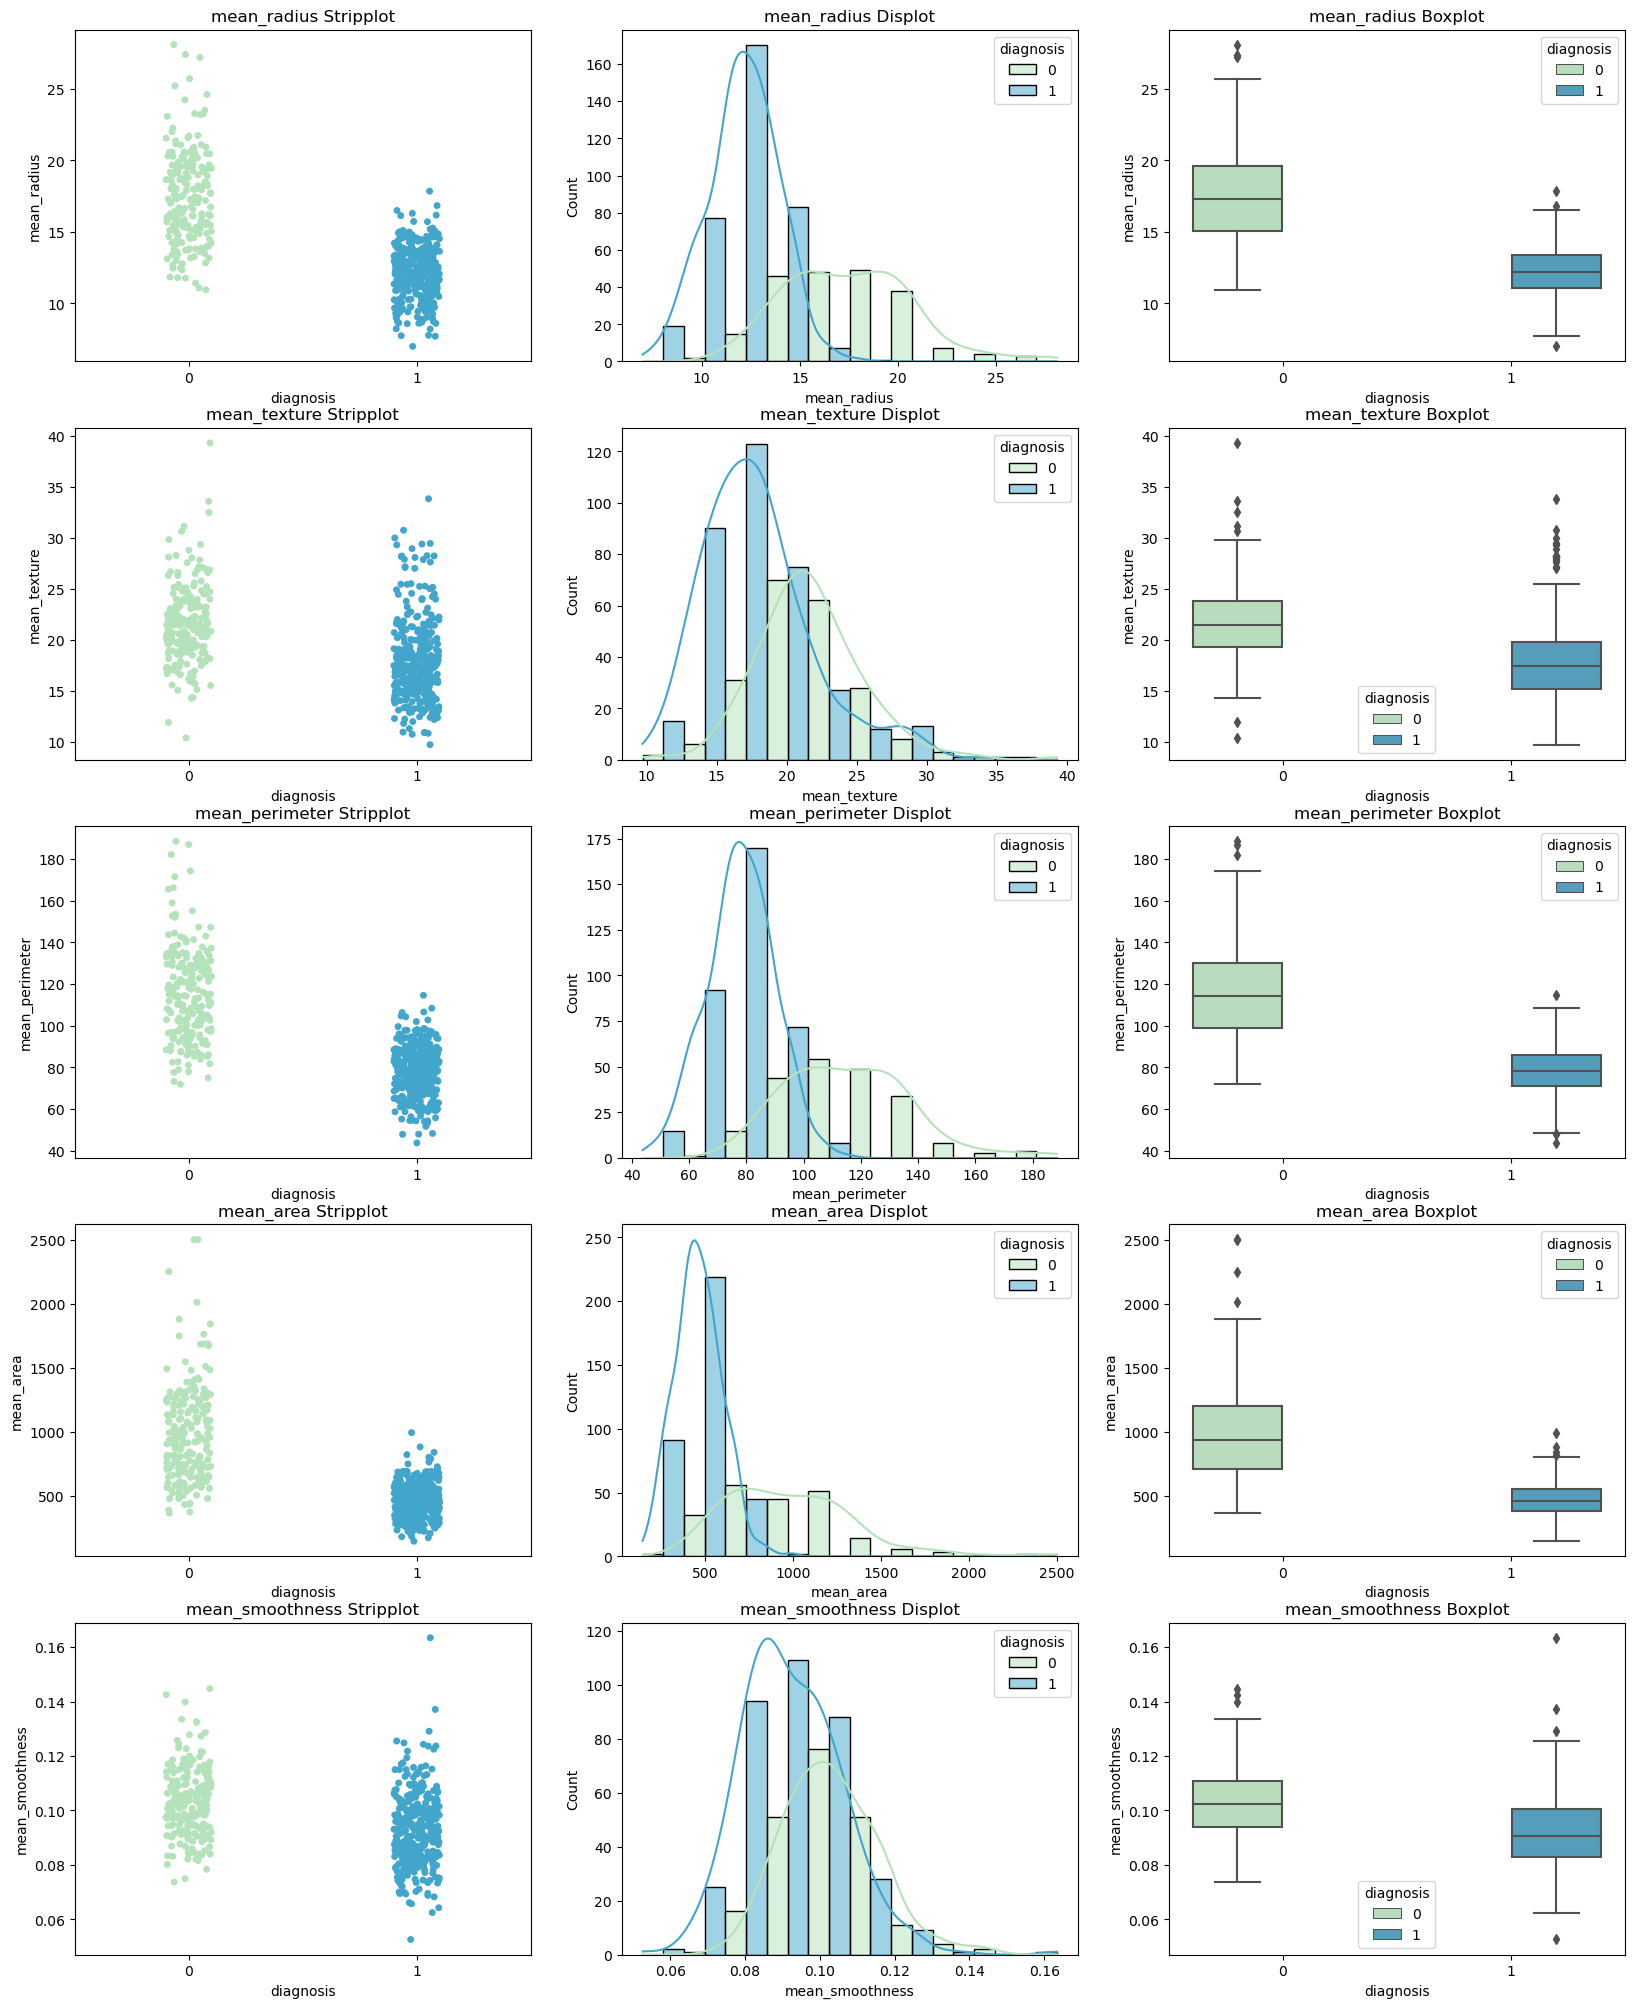

In [12]:
fig, axes = plt.subplots(5, 3, figsize=(20,25))
for i, col in zip(range(5), cols):
    sns.stripplot(ax=axes[i][0], x='diagnosis', y=col, data=df, palette='GnBu', jitter=True)
    axes[i][0].set_title(f'{col} Stripplot')
    sns.histplot(ax=axes[i][1], x=col, data=df, kde=True, bins=10, palette='GnBu', hue='diagnosis', multiple='dodge')
    axes[i][1].set_title(f'{col} Displot')
    sns.boxplot(ax=axes[i][2], x='diagnosis', y=col, data=df, palette='GnBu', hue='diagnosis')
    axes[i][2].set_title(f'{col} Boxplot')

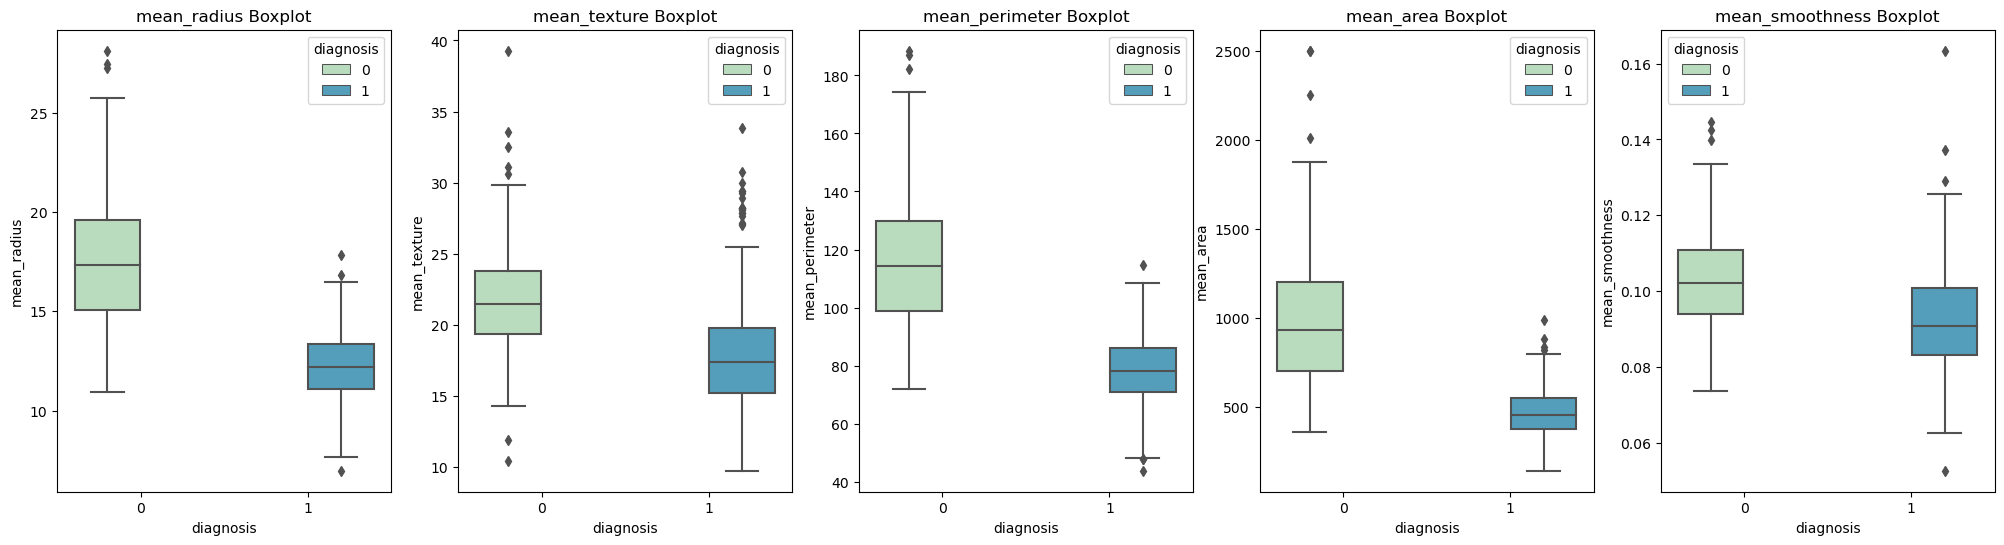

In [13]:
ig, axes = plt.subplots(1, 5, figsize=(25,6))
for i, col in zip(range(5), cols):
    sns.boxplot(ax=axes[i], x='diagnosis', y=col, data=df, palette='GnBu', hue='diagnosis')
    axes[i].set_title(f'{col} Boxplot')

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=cols)
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.0


In [15]:
X = df_scaled.iloc[:,:5]
y = df_scaled['diagnosis']
X.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,0.521037,0.022658,0.545989,0.363733,0.593753
1,0.643144,0.272574,0.615783,0.501591,0.289880
2,0.601496,0.390260,0.595743,0.449417,0.514309
3,0.210090,0.360839,0.233501,0.102906,0.811321
4,0.629893,0.156578,0.630986,0.489290,0.430351


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [18]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    }

In [20]:
import warnings
warnings.filterwarnings('always')

NameError: name 'Image' is not defined